In [5]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [6]:
columns_name = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']

In [7]:
data = pd.read_csv('/content/magic04.data', sep=',', names=columns_name, header=None)
data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [8]:
data.shape

(19020, 11)

In [9]:
data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [10]:
data.tail()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h
19019,187.1814,53.0014,3.2093,0.2876,0.1539,-167.3125,-168.4558,31.4755,52.7310,272.3174,h


In [11]:
data.dtypes

,0
fLength,float64
fWidth,float64
fSize,float64
fConc,float64
fConc1,float64
fAsym,float64
fM3Long,float64
fM3Trans,float64
fAlpha,float64
fDist,float64


In [12]:
data.isnull().sum()

,0
fLength,0
fWidth,0
fSize,0
fConc,0
fConc1,0
fAsym,0
fM3Long,0
fM3Trans,0
fAlpha,0
fDist,0


In [13]:
data.duplicated().sum()

np.int64(115)

In [14]:
data['class'].value_counts()

,count
class,
g,12332
h,6688


In [15]:
feature_cols = [
    'fLength', 'fWidth', 'fSize', 'fConc', 'fConc1',
    'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist'
]

In [16]:
X = data[feature_cols].copy()
y = data['class'].copy()

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
X_scaled.shape

(19020, 10)

In [19]:
iso = IsolationForest(
    n_estimators=100,
    contamination=0.02,
    random_state=42
)

In [20]:
outlier_pred = iso.fit_predict(X_scaled)

In [21]:
data['outlier'] = outlier_pred

In [22]:
num_outliers = (outlier_pred == -1).sum()
num_inliers = (outlier_pred == 1).sum()

In [23]:
num_outliers

np.int64(381)

In [24]:
num_inliers

np.int64(18639)

In [25]:
mask_inliers = (outlier_pred == 1)
X_clean = X_scaled[mask_inliers]
y_clean = y[mask_inliers].reset_index(drop=True)
data_clean = data[mask_inliers].reset_index(drop=True)

In [26]:
X_clean.shape

(18639, 10)

In [27]:
Ks = range(2, 10)
inertias = []
sil_scores = []

In [28]:
for k in Ks:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    labels_k = kmeans.fit_predict(X_clean)

    inertias.append(kmeans.inertia_)
    sil = silhouette_score(X_clean, labels_k)
    sil_scores.append(sil)

In [29]:
for k, inertia, sil in zip(Ks, inertias, sil_scores):
    print(f'{k}: {inertia:.3f}, sil: {sil:.3f}')
print()

2: 108963.778, sil: 0.286
3: 93950.034, sil: 0.202
4: 82434.227, sil: 0.211
5: 75954.959, sil: 0.203
6: 70409.232, sil: 0.203
7: 66453.075, sil: 0.167
8: 63070.046, sil: 0.173
9: 60671.826, sil: 0.158



In [30]:
best_k = 2

In [31]:
kmeans_final = KMeans(
    n_clusters=best_k,
    random_state=42,
    n_init=10
)

In [32]:
cluster_labels = kmeans_final.fit_predict(X_clean)

In [33]:
data_clean['cluster'] = cluster_labels

In [34]:
print("Cluster counts:")
print(pd.Series(cluster_labels).value_counts())

Cluster counts:
1    10350
0     8289
Name: count, dtype: int64


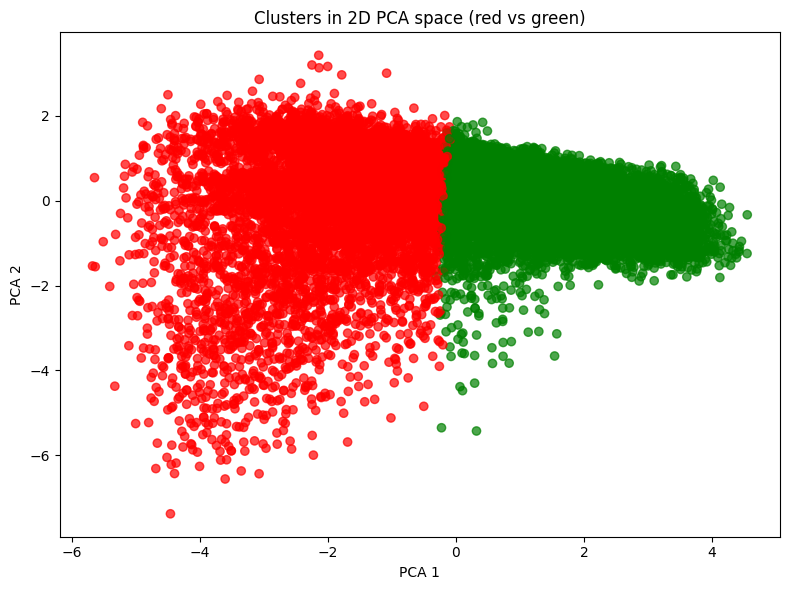

In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clean)

color_map = {0: "red", 1: "green"}
colors = [color_map[c] for c in cluster_labels]

plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=colors,
    alpha=0.7
)

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Clusters in 2D PCA space (red vs green)")
plt.tight_layout()
plt.show()


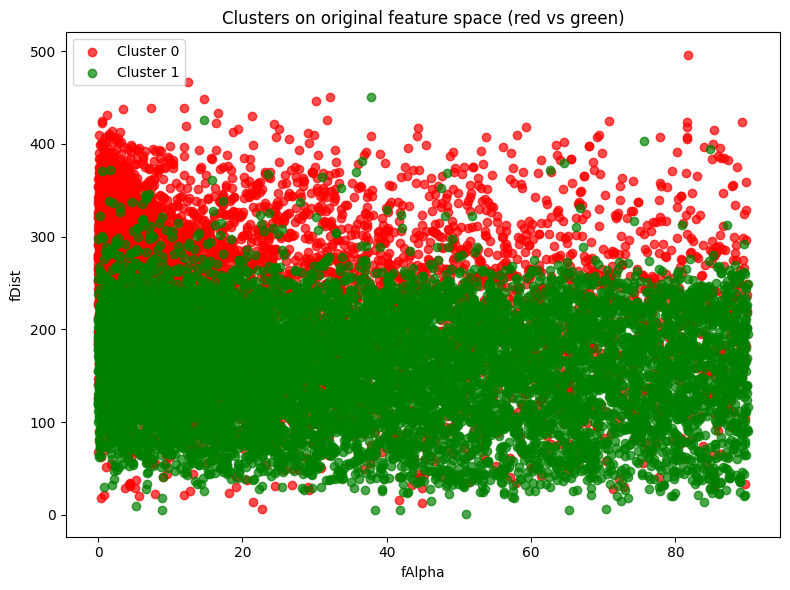

In [36]:
plt.figure(figsize=(8, 6))

color_map = {0: "red", 1: "green"}

for cl, col in color_map.items():
    mask = (data_clean['cluster'] == cl)
    plt.scatter(
        data_clean.loc[mask, 'fAlpha'],
        data_clean.loc[mask, 'fDist'],
        c=col,
        alpha=0.7,
        label=f"Cluster {cl}"
    )

plt.xlabel("fAlpha")
plt.ylabel("fDist")
plt.title("Clusters on original feature space (red vs green)")
plt.legend()
plt.tight_layout()
plt.show()


In [37]:
print("Cluster vs class (counts):")
print(pd.crosstab(data_clean['cluster'], y_clean), "\n")

Cluster vs class (counts):
class       g     h
cluster            
0        5523  2766
1        6798  3552 



In [38]:
print("Cluster vs class (row-normalized):")
print(pd.crosstab(data_clean['cluster'], y_clean, normalize='index'))

Cluster vs class (row-normalized):
class           g         h
cluster                    
0        0.666305  0.333695
1        0.656812  0.343188


## Frequent Itemset & Association Rule Mining

In [39]:
data_disc = data_clean.copy()

n_bins = 3
labels = ['low', 'medium', 'high']

for col in feature_cols:
    data_disc[col] = pd.qcut(data_disc[col], q=n_bins, labels=labels)


In [39]:
data_disc['class'] = data_disc['class'].map({'g': 'gamma', 'h': 'hadron'})

In [40]:
transactions_df = pd.get_dummies(data_disc.astype(str))

In [41]:
transactions_df.head()

,fLength_high,fLength_low,fLength_medium,fWidth_high,fWidth_low,fWidth_medium,fSize_high,fSize_low,fSize_medium,fConc_high,...,fAlpha_low,fAlpha_medium,fDist_high,fDist_low,fDist_medium,class_g,class_h,outlier_1,cluster_0,cluster_1
0,False,False,True,False,False,True,False,False,True,False,...,False,False,False,True,False,True,False,True,False,True
1,False,False,True,False,True,False,False,True,False,True,...,True,False,False,False,True,True,False,True,False,True
2,False,True,False,False,True,False,False,True,False,True,...,False,True,False,True,False,True,False,True,False,True
3,True,False,False,True,False,False,True,False,False,False,...,True,False,True,False,False,True,False,True,True,False
4,False,False,True,True,False,False,False,False,True,False,...,True,False,True,False,False,True,False,True,True,False


In [42]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18639 entries, 0 to 18638
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   fLength_high     18639 non-null  bool 
 1   fLength_low      18639 non-null  bool 
 2   fLength_medium   18639 non-null  bool 
 3   fWidth_high      18639 non-null  bool 
 4   fWidth_low       18639 non-null  bool 
 5   fWidth_medium    18639 non-null  bool 
 6   fSize_high       18639 non-null  bool 
 7   fSize_low        18639 non-null  bool 
 8   fSize_medium     18639 non-null  bool 
 9   fConc_high       18639 non-null  bool 
 10  fConc_low        18639 non-null  bool 
 11  fConc_medium     18639 non-null  bool 
 12  fConc1_high      18639 non-null  bool 
 13  fConc1_low       18639 non-null  bool 
 14  fConc1_medium    18639 non-null  bool 
 15  fAsym_high       18639 non-null  bool 
 16  fAsym_low        18639 non-null  bool 
 17  fAsym_medium     18639 non-null  bool 
 18  fM3Lon

In [44]:
from mlxtend.frequent_patterns import apriori, association_rules

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [45]:
frequent_itemsets = apriori(
    transactions_df,
    min_support=0.05,
    use_colnames=True
)

frequent_itemsets.sort_values('support', ascending=False).head(10)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,support,itemsets
32,1.000000,(outlier_1)
30,0.661033,(class_g)
533,0.661033,"(outlier_1, class_g)"
540,0.555287,"(outlier_1, cluster_1)"
34,0.555287,(cluster_1)
33,0.444713,(cluster_0)
539,0.444713,"(outlier_1, cluster_0)"
535,0.364719,"(cluster_1, class_g)"
2559,0.364719,"(outlier_1, cluster_1, class_g)"
536,0.338967,"(outlier_1, class_h)"


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [46]:
rules = association_rules(
    frequent_itemsets,
    metric="confidence",
    min_threshold=0.6
)

rules.head()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(fLength_high),(fWidth_high),0.333333,0.333333,0.250335,0.751006,2.253018,1.0,0.139224,2.677440,0.834226,0.601289,0.626509,0.751006
1,(fWidth_high),(fLength_high),0.333333,0.333333,0.250335,0.751006,2.253018,1.0,0.139224,2.677440,0.834226,0.601289,0.626509,0.751006
2,(fLength_high),(fSize_high),0.333333,0.333226,0.255218,0.765653,2.297698,1.0,0.144142,2.845238,0.847173,0.620451,0.648536,0.765776
3,(fSize_high),(fLength_high),0.333226,0.333333,0.255218,0.765899,2.297698,1.0,0.144142,2.847776,0.847036,0.620451,0.648849,0.765776
4,(fLength_high),(fConc_low),0.333333,0.333441,0.243897,0.731692,2.194368,1.0,0.132750,2.484303,0.816432,0.576757,0.597473,0.731574


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [47]:
rules_class = rules[
    rules['consequents'].astype(str).str.contains('class_')
].sort_values('lift', ascending=False)

rules_class.head(10)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
67946,"(fConc1_low, fLength_high, fAlpha_high)","(class_h, fConc_low, cluster_0)",0.057836,0.107409,0.052846,0.913729,8.506992,1.0,0.046634,10.346375,0.936620,0.470167,0.903348,0.702869
139504,"(fConc1_low, fLength_high, fAlpha_high)","(outlier_1, fConc_low, cluster_0, class_h)",0.057836,0.107409,0.052846,0.913729,8.506992,1.0,0.046634,10.346375,0.936620,0.470167,0.903348,0.702869
139480,"(outlier_1, fConc1_low, fLength_high, fAlpha_h...","(class_h, fConc_low, cluster_0)",0.057836,0.107409,0.052846,0.913729,8.506992,1.0,0.046634,10.346375,0.936620,0.470167,0.903348,0.702869
139502,"(fConc_low, fLength_high, fAlpha_high)","(outlier_1, fConc1_low, cluster_0, class_h)",0.058801,0.106122,0.052846,0.898723,8.468802,1.0,0.046606,8.826043,0.937018,0.471517,0.886699,0.698350
139478,"(outlier_1, fConc_low, fLength_high, fAlpha_high)","(class_h, fConc1_low, cluster_0)",0.058801,0.106122,0.052846,0.898723,8.468802,1.0,0.046606,8.826043,0.937018,0.471517,0.886699,0.698350
67944,"(fConc_low, fLength_high, fAlpha_high)","(class_h, fConc1_low, cluster_0)",0.058801,0.106122,0.052846,0.898723,8.468802,1.0,0.046606,8.826043,0.937018,0.471517,0.886699,0.698350
139467,"(outlier_1, fAlpha_high, fConc1_low, fLength_h...","(class_h, fConc_low)",0.056602,0.110575,0.052846,0.933649,8.443614,1.0,0.046587,13.404911,0.934459,0.462224,0.925400,0.705786
139492,"(fConc1_low, fLength_high, cluster_0, fAlpha_h...","(outlier_1, fConc_low, class_h)",0.056602,0.110575,0.052846,0.933649,8.443614,1.0,0.046587,13.404911,0.934459,0.462224,0.925400,0.705786
67938,"(fConc1_low, fLength_high, cluster_0, fAlpha_h...","(class_h, fConc_low)",0.056602,0.110575,0.052846,0.933649,8.443614,1.0,0.046587,13.404911,0.934459,0.462224,0.925400,0.705786
102566,"(fConc_low, cluster_0, fAlpha_high)","(class_h, fConc1_low, fSize_high)",0.068029,0.093245,0.053061,0.779968,8.364690,1.0,0.046717,4.121021,0.944718,0.490332,0.757342,0.674507


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

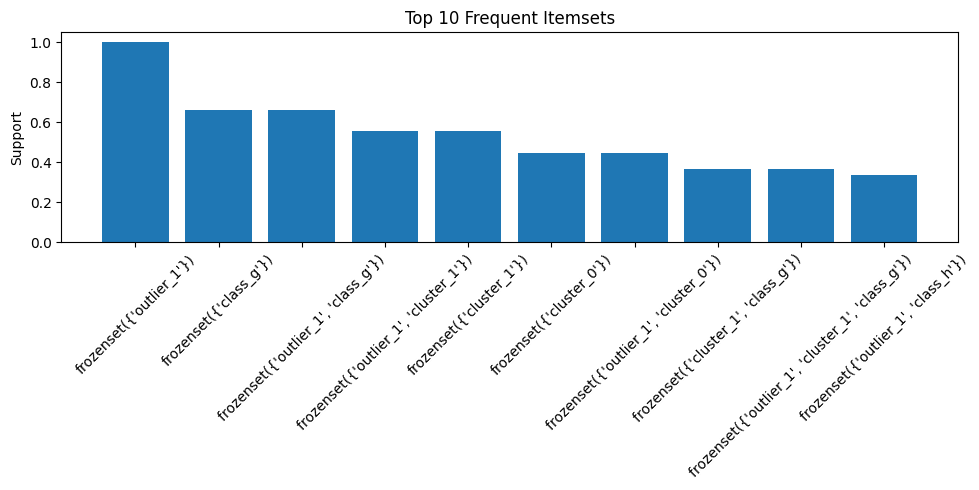

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [50]:
top_itemsets = frequent_itemsets.sort_values('support', ascending=False).head(10)
labels_txt = top_itemsets['itemsets'].astype(str)

plt.figure(figsize=(10, 5))
plt.bar(range(len(top_itemsets)), top_itemsets['support'])
plt.xticks(range(len(top_itemsets)), labels_txt, rotation=45)
plt.ylabel("Support")
plt.title("Top 10 Frequent Itemsets")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

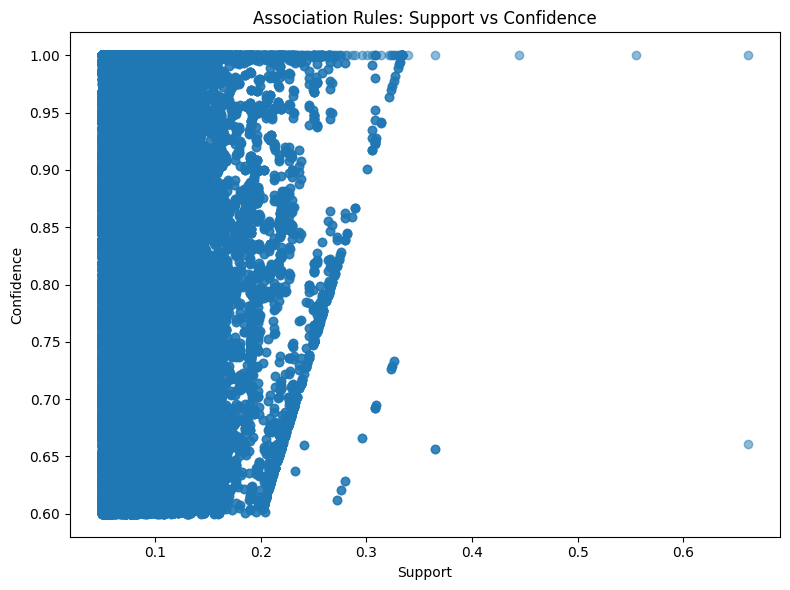

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [49]:
plt.figure(figsize=(8, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs Confidence')
plt.tight_layout()
plt.show()